<a href="https://colab.research.google.com/github/cassyrr/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Motivation

- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### 2. Dataset

- Source: Kaggle\
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

- contains transactions made by credit cards in September 2013 by European cardholders in two days

- 284,807 transactions

- contains only numerical input variables, V1 ... V28, Time, Amount, Class (1:fraud, 0:otherwise)

### 3. EDA (Exploratory Data Analysis)

(1) Checking Missing Value

(2) Length of Each Class

(3) Amount vs. Class

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload dataset
credit_data = pd.read_csv('/content/creditcard.csv')
credit_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check missing
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# check outliers and distribution
credit_data.describe()
error_class = credit_data[(credit_data['Class'] != 0) & (credit_data['Class'] != 1) ]
len(error_class)

0

In [5]:
# distribution of 'Amount' for each class
description = credit_data.groupby('Class')['Amount'].describe()
print(description)

          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


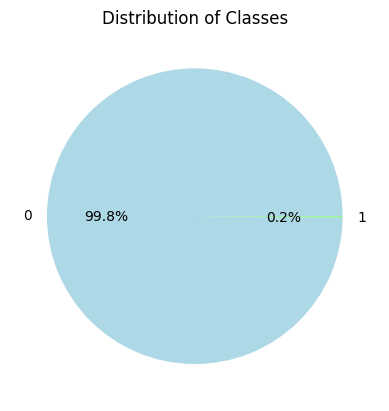

In [6]:
# Counts of fraud cases
# Calculate the counts of each class label
class_counts = credit_data['Class'].value_counts()
colors = ['lightblue', 'lightgreen']
# Create pie chart
plt.title('Distribution of Classes')
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors)
plt.ylabel('')
plt.show()

* **Summary:**

a. No missing values\
b. No error value such as outliers or negative values in 'Amount'\
c. The mean of 'Amount' for all transactions is around 88, and it ranges from 0 and 25,691\
d. All 'class' are correctly represented as 0 or 1, not error values\
e. The fraud transaction amount has a higher mean than non-fraud transaction, which is 122.\
f. Issue found: the dataset is highly imbalanced with huge differences in number of fraud transactions and non-fraud transactions, which would make the classifier not perform well in defecting fraud due to bias towards the majority class.

* To fix the imbalanced issue, I need to downsample the non-fraud transactions. For instance, to make sure each class makes up at least 25% of the dataset. But since I'm not able to obtain more fraud transactions data to expand the size of this class, I need to decrease the size of non-fraud class with the same size as the fraud transactions.

In [17]:
# downsample the non-fraud transactions
fraud = credit_data[credit_data['Class'] == 1]
non_fraud = credit_data[credit_data['Class'] == 0]

resample = non_fraud.sample(n = len(fraud), random_state=42)

balanced_df = pd.concat([fraud, resample])

balanced_df = balanced_df.sample(frac = 1, random_state = 42) # shuffle the new dataset

balanced_df.shape

(984, 31)

###4. Machine Learning Model Training

* Fit 3 types of classifier with using cross-validation to estimate the confusion matrix.

* Decision Tree
* Boosted Decision Stumps
* Random Forest

In [18]:
# split features and class in the dataset
balanced_df = balanced_df.drop(columns = ['Time', 'Amount'])
X = balanced_df.drop(columns = ['Class'])
y = balanced_df['Class']

In [19]:
# ML libraries
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

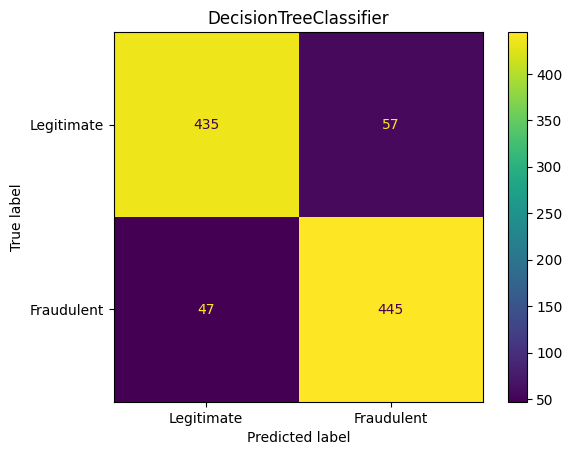

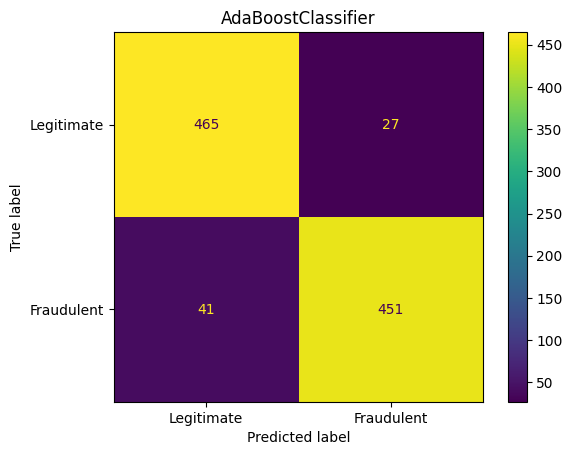

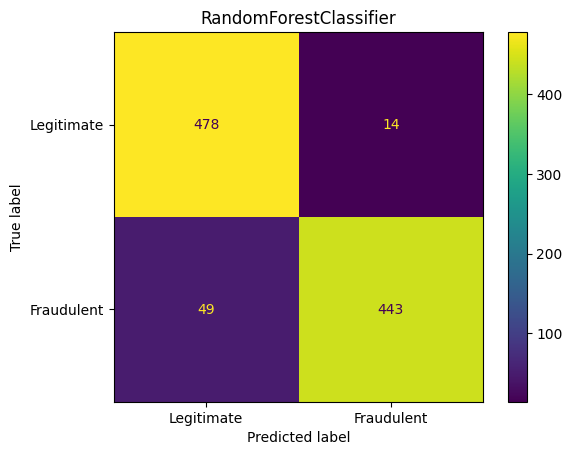

In [23]:
# define all 3 classifiers together
classifiers = [
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier()
]

# fit classifier and estimate confusion materix using cross-validation
for clf in classifiers:
  pred_y = cross_val_predict(clf, X, y, cv = 5)
  c_matrix = confusion_matrix(y, pred_y)
  disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = ['Legitimate', 'Fraudulent'])
  disp.plot()
  plt.title(type(clf).__name__)
  plt.show()

* Using the data from the confusion matrices, I calculated the accuracy for each classifier:

Decision Tree Classifier : 89.4%\
AdaBoost Classifier: 93.1%\
Random Forest Classifier: 93.6%

These results indicate that both the AdaBoost Classifier and Random Forest Classifier outperform the Decision Tree Classifier in terms of accuracy. This suggests that ensemble methods, such as AdaBoost and Random Forest, tend to yield more accurate and robust predictions compared to methods based on a single decision tree.